In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

## Load the dataset into a Pandas dataframe.

In [2]:
data_file_path = r'C:\Users\getan\Desktop\PW_Assignment\Week18_KNN_&_PCA\PCA_Assignment\wine.data'
name_file_path = r'C:\Users\getan\Desktop\PW_Assignment\Week18_KNN_&_PCA\PCA_Assignment\wine.name'
index_file_path = r'C:\Users\getan\Desktop\PW_Assignment\Week18_KNN_&_PCA\PCA_Assignment\Index'

In [3]:
df = pd.read_csv('wine.data',header=None)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
column_names = [  
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

# Assigning column names to the DataFrame
df.columns = column_names


In [11]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Split the dataset into features and target variables.

In [30]:
X = df.drop('Class', axis=1) 
y = df['Class']  

## Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [31]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [32]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

#### Checking for Outliers in training data and handling it

In [34]:
training_numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(training_numerical_columns)

13

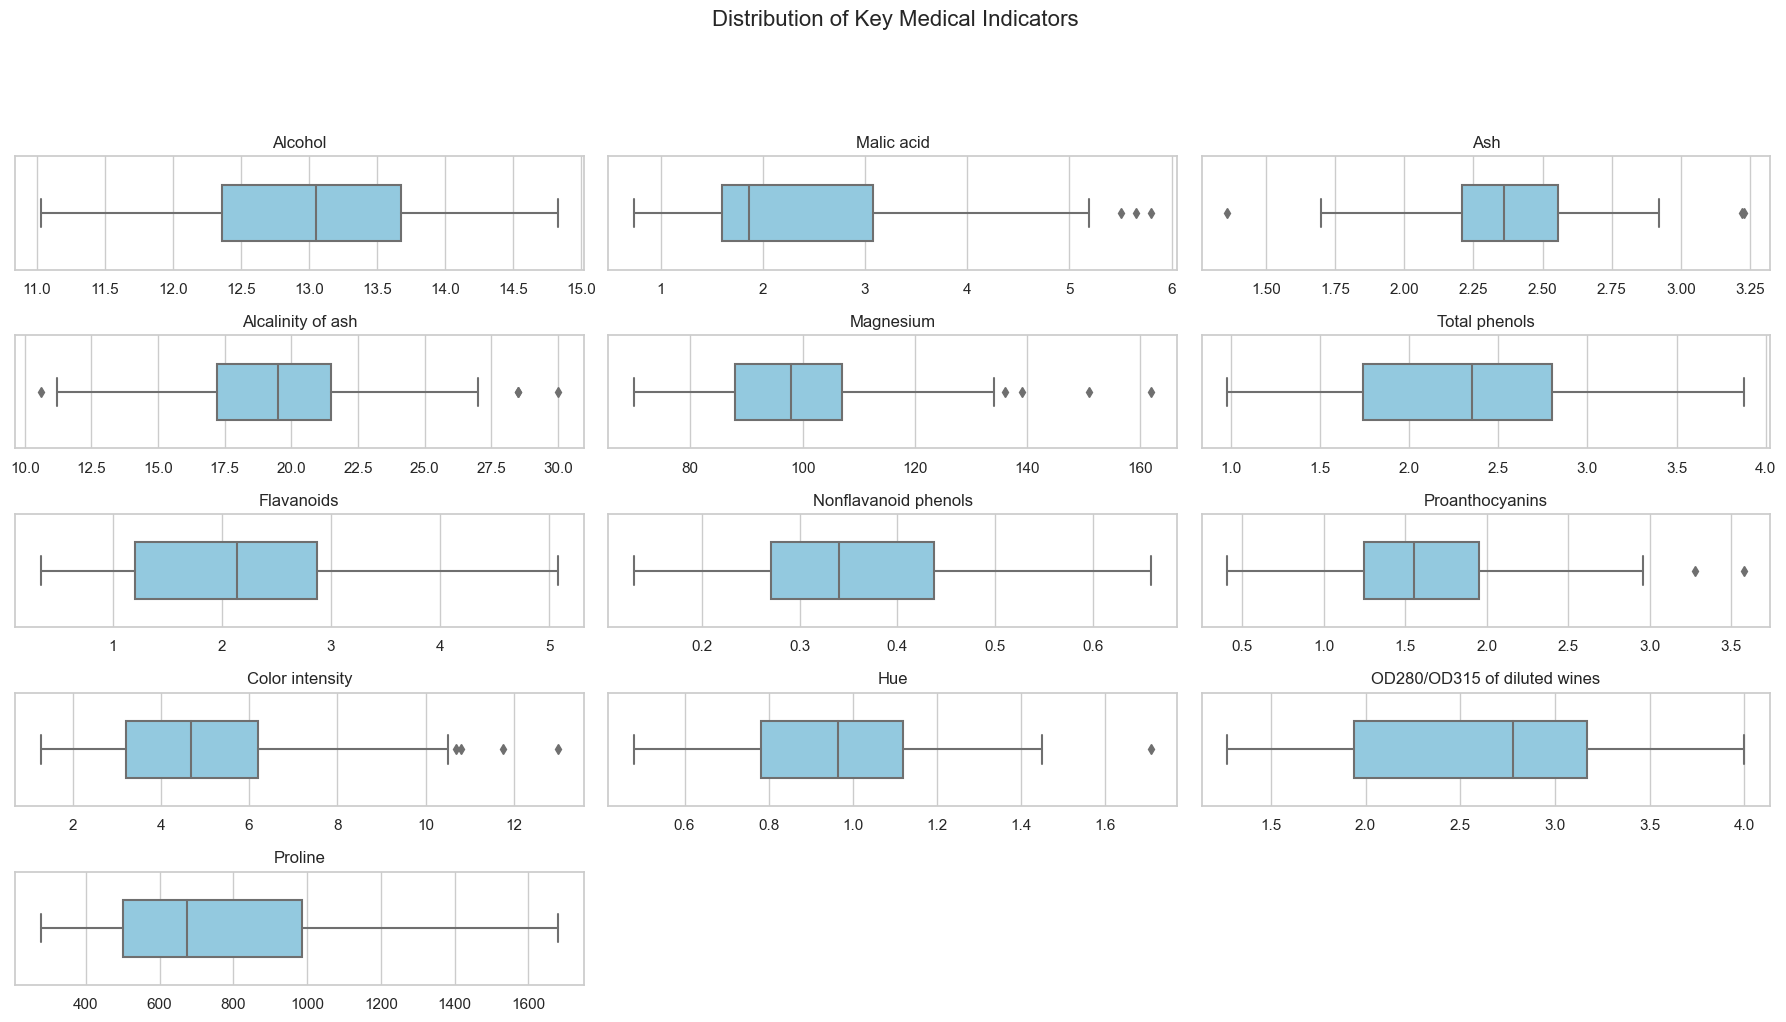

In [35]:
# Create box plots for each numerical column
plt.figure(figsize=(18, 10))

sns.set_palette("husl")
sns.set(style="whitegrid") 

# Adjust the number of rows and columns in the subplot
num_rows = 5
num_cols = 3

for i, col in enumerate(training_numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=X[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


#### we see that very less outliers are there still we handle this 

In [36]:
for col in training_numerical_columns:
    median_value = X[col].median()
    lower_bound = X[col].quantile(0.25) - 1.5 * (X[col].quantile(0.75) - X[col].quantile(0.25))
    upper_bound = X[col].quantile(0.75) + 1.5 * (X[col].quantile(0.75) - X[col].quantile(0.25))
    X[col] = X[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    

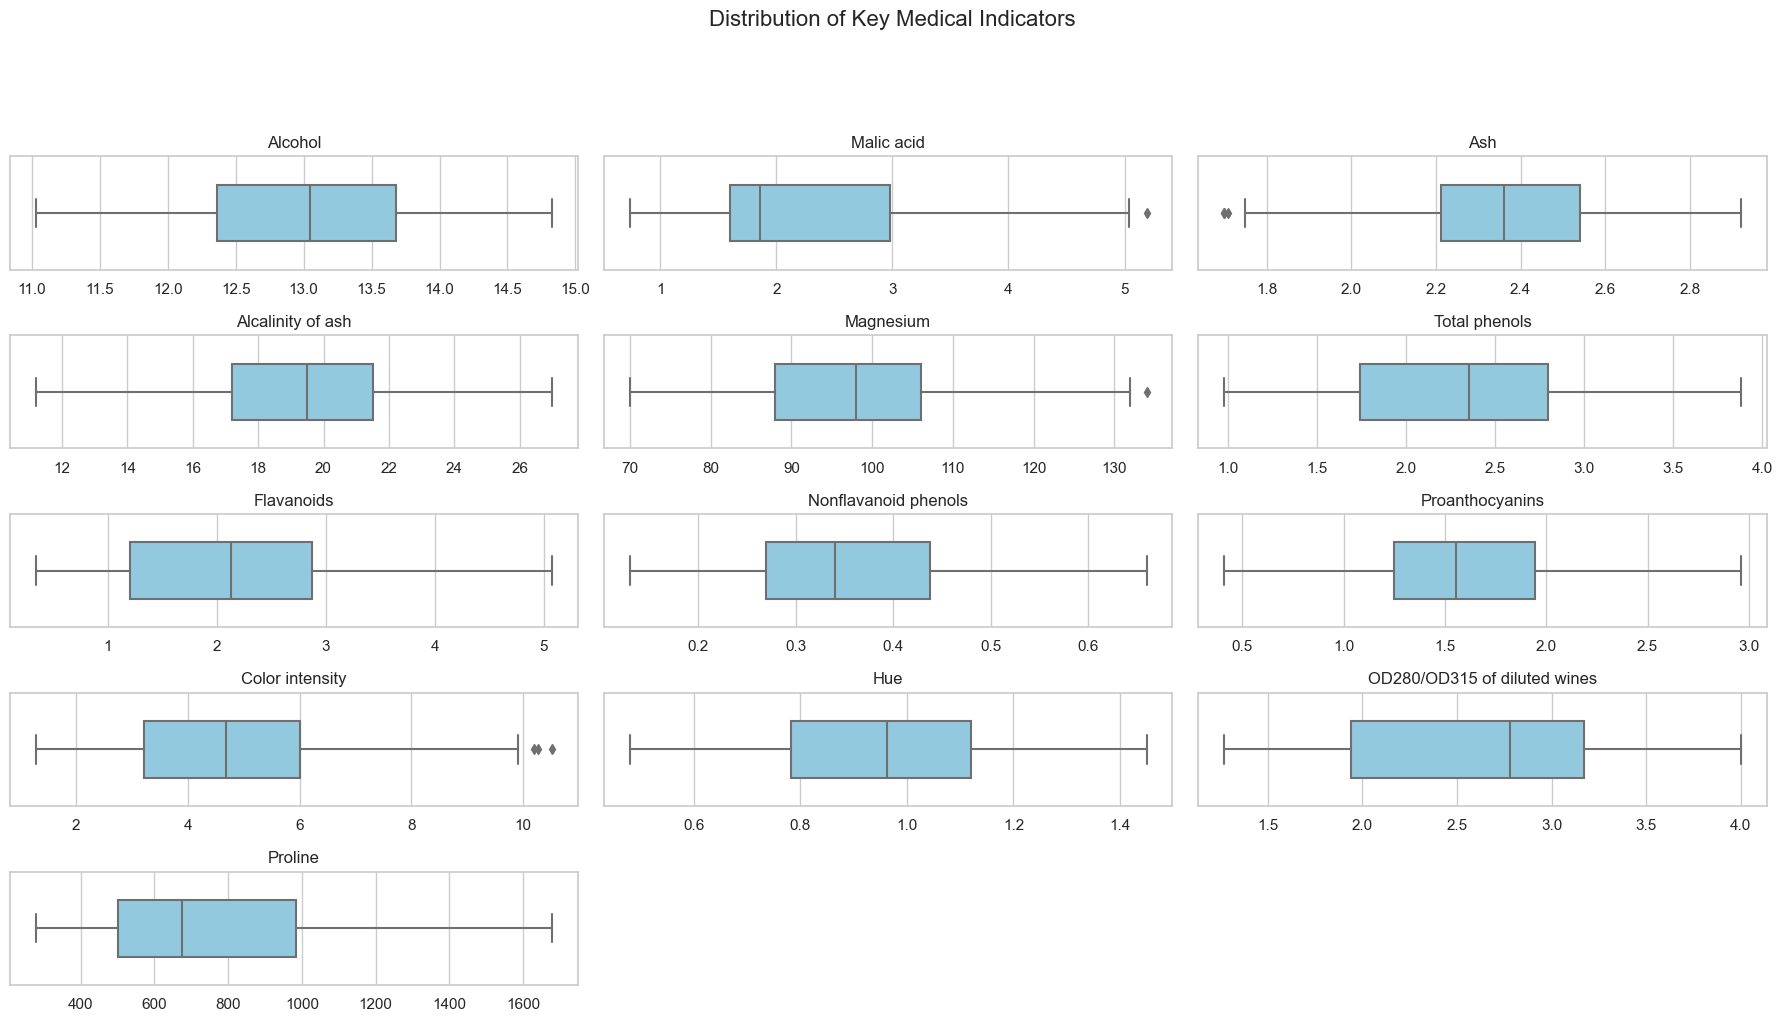

In [37]:
# Create box plots for each numerical column
plt.figure(figsize=(18, 10))

sns.set_palette("husl")
sns.set(style="whitegrid") 

# Adjust the number of rows and columns in the subplot
num_rows = 5
num_cols = 3

for i, col in enumerate(training_numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=X[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


#### splitiing the data in train test  spit 

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling the Data

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
X_test_scaled = scaler.transform(X_test)

## Implement PCA on the preprocessed dataset using the scikit-learn library.
## Determine the optimal number of principal components to retain based on the explained variance ratio.

In [44]:
X_train_scaled.shape

(142, 13)

In [45]:
## PCA- Transformation
pca=PCA(n_components=12)
pca

PCA(n_components=12)

In [48]:
X_train=pca.fit_transform(X_train_scaled)
X_train

array([[-0.81580469, -1.54896293,  1.93375638, ...,  1.13503424,
        -0.54925992,  1.01649367],
       [-3.21327646, -0.01989798,  1.42721404, ..., -0.06973134,
        -0.07539701,  0.18236252],
       [ 2.30288223,  1.53931521, -0.36269293, ..., -0.28819367,
         0.8884816 ,  0.57420264],
       ...,
       [ 4.55218719, -2.38435725, -1.03196363, ..., -0.09224618,
         0.42346783,  0.37811155],
       [-1.84429591,  1.62293576, -0.14148425, ...,  0.42928109,
        -0.30257903, -0.05770473],
       [-0.20783504,  1.17834667,  1.17160245, ...,  0.55569001,
        -0.50530806, -0.39223278]])

In [49]:
X_test=pca.transform(X_test_scaled)
X_test

array([[ 2.15756106, -1.31833844,  0.17089885, -0.22039848,  1.57795864,
         1.00531301, -0.04886746, -0.09166612, -0.09197125,  0.74382857,
         0.22360949, -0.56526985],
       [ 1.12505668, -1.96429233,  0.4308759 ,  0.24700845,  0.92766678,
         1.66898106, -0.12253517, -0.82929367,  0.53232099, -0.09402677,
        -0.74829461,  0.17969404],
       [-2.79942951, -0.44377323,  0.83215027, -0.82602187, -0.52920663,
         0.53917665, -0.01185857, -0.34000593, -0.37847175,  0.65846671,
        -0.45055138, -0.50863917],
       [ 2.43027739, -1.2976867 ,  1.614647  , -0.05419868, -0.88303091,
        -0.63361844, -1.15038392,  0.45652776, -0.25054402, -0.97326765,
         0.27954449,  0.63937167],
       [ 0.24456867,  2.57405573, -1.31275106,  0.02912488, -0.36583346,
         0.12035396, -0.70545629, -1.04966563,  0.29839208, -0.90126896,
        -0.12518816, -1.06174416],
       [ 2.16446313, -2.61765289,  1.16536215, -0.87905374, -0.19269985,
        -0.26598033, -

In [50]:
pca.components_

array([[ 0.1449712 , -0.23851699, -0.03323363, -0.29604291,  0.12757072,
         0.38218303,  0.41880113, -0.28812931,  0.31433482, -0.07787622,
         0.29629688,  0.37629769,  0.2798807 ],
       [-0.46664283, -0.2183462 , -0.31094843,  0.07753424, -0.35528556,
        -0.05670647,  0.01471203, -0.08147431, -0.02275225, -0.51978931,
         0.25051419,  0.16240337, -0.36842931],
       [-0.10460359,  0.12500832,  0.67889205,  0.52291041,  0.10846617,
         0.19489862,  0.13950814,  0.19624604,  0.11811899, -0.23497786,
         0.08624593,  0.21109924, -0.10103432],
       [ 0.02032098,  0.4366529 , -0.20751827,  0.04941333, -0.4652521 ,
         0.20911132,  0.1588311 ,  0.09049232,  0.52418454,  0.17677104,
        -0.35009851,  0.12229063, -0.1620838 ],
       [-0.30099805,  0.34102521, -0.09642921,  0.04327192,  0.52388821,
         0.03242823,  0.05382275, -0.5944027 , -0.04828399, -0.04588263,
        -0.30619214,  0.06631483, -0.21822279],
       [ 0.21821934,  0.705913

In [51]:
pca.explained_variance_ratio_

array([0.36944742, 0.19873928, 0.09635734, 0.07292273, 0.06112116,
       0.04401438, 0.03927867, 0.02873551, 0.02602935, 0.02054413,
       0.01971002, 0.01498037])

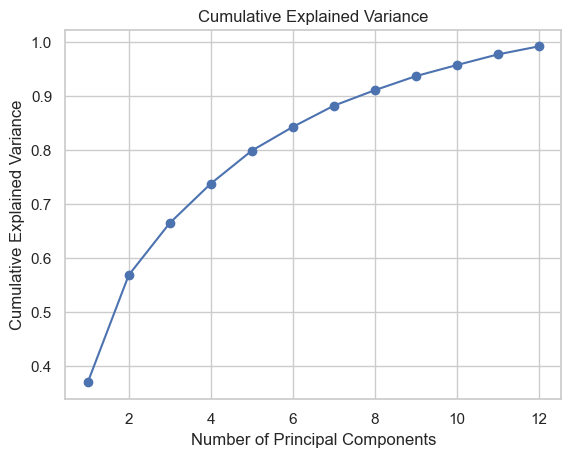

In [52]:
# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


## Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X_train)

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(X_train)

# Assign the cluster labels to the original DataFrame
df_train_clustered = pd.DataFrame(data=X_train, columns=[f'PC{i}' for i in range(1, X_train.shape[1] + 1)])
df_train_clustered['Cluster'] = cluster_labels
df_train_clustered['Class'] = y_train  # Assuming 'Class' is your target variable

# Display the DataFrame with cluster labels
print(df_train_clustered.head())



        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.815805 -1.548963  1.933756  1.387763 -1.149755 -2.025998 -0.931516   
1 -3.213276 -0.019898  1.427214 -0.712744 -1.164080 -0.993561  0.217690   
2  2.302882  1.539315 -0.362693  0.946419  0.109440 -1.062542 -0.136077   
3 -1.366479 -0.732729  1.132919  1.203607 -1.162337 -1.731519 -0.662407   
4  1.664917  0.664838 -1.386073 -0.862058 -0.309542  0.519914  0.035814   

        PC8       PC9      PC10      PC11      PC12  Cluster  Class  
0  0.712164  1.000051  1.135034 -0.549260  1.016494        0    1.0  
1 -0.122180  0.075435 -0.069731 -0.075397  0.182363        0    1.0  
2 -1.148004 -0.052205 -0.288194  0.888482  0.574203        2    1.0  
3  0.242120 -0.003554  1.216492 -0.207493  0.822212        0    1.0  
4 -0.183332 -0.207706 -0.111682 -0.062171  0.388592        1    1.0  


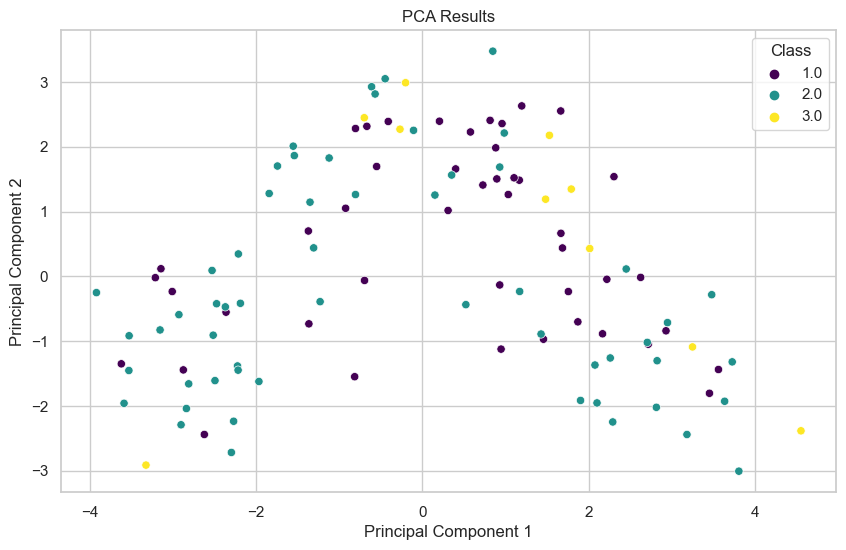

In [55]:
# Scatter plot to visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_train_clustered, palette='viridis')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [60]:
metrics_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'Value': [metrics.silhouette_score(X_train, cluster_labels),
              metrics.calinski_harabasz_score(X_train, cluster_labels),
              metrics.davies_bouldin_score(X_train, cluster_labels)]
})

In [61]:
print(metrics_table)

                    Metric      Value
0         Silhouette Score   0.278967
1  Calinski-Harabasz Index  59.033437
2     Davies-Bouldin Index   1.362344


## Interpret the results of PCA and clustering analysis.

# Wine Dataset Analysis Report

## 1. Introduction

This analysis aims to explore the Wine Recognition dataset, focusing on implementing Principal Component Analysis (PCA) and clustering using the K-Means algorithm. The dataset contains chemical analysis results for wines from three different cultivars. The analysis will provide insights into the structure of the data, the optimal number of principal components, and the quality of clusters formed by the K-Means algorithm.

## 2. Data Loading and Exploration

The dataset was loaded and examined for its structure. The dataset contains 14 columns, including one for the class label and 13 features representing various chemical attributes of the wines.

## 3. Data Preprocessing

Data preprocessing involved handling outliers, splitting the data into training and testing sets, and scaling the features. Outliers were addressed using the median value for each feature. The data was then split into training and testing sets, and scaling was applied using StandardScaler.

## 4. Principal Component Analysis (PCA)

PCA was applied to reduce the dimensionality of the dataset. The optimal number of principal components was determined by analyzing the explained variance ratio. A cumulative explained variance plot was used to visualize the contribution of each principal component.

## 5. K-Means Clustering

K-Means clustering was performed on the PCA-transformed data. The optimal number of clusters (k=3) was chosen based on prior knowledge of the dataset. Clustering metrics, including Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index, were used to assess the quality of the clusters formed.

## 6. Results

- **Explained Variance Ratio:**
  - The cumulative explained variance plot indicated that around 95% of the variance could be explained by the first 12 principal components.

- **K-Means Clustering Metrics:**
  - Silhouette Score: 0.278967
  - Calinski-Harabasz Index: 59.033437
  - Davies-Bouldin Index: 1.362344

The clustering metrics suggest that the K-Means algorithm produced reasonably well-defined clusters in the PCA-transformed data.

## 7. Visualizations

A scatter plot was created to visualize the results of PCA in the reduced-dimensional space. This plot helps to observe the distribution of data points and the separation between clusters.

